# Task 2: Prediction using Unsupervised ML
## <blockquote>K-Means Clustering Task<br>Predict the optimum number of clusters and represent it visually.</blockquote>
### Author: Marisha Bhatti
<br>
<br>

This notebook has two parts. The first part uses a K-Nearest Neighbors model to perform a simple multi-classification task (Step 1 - 6). The second part tackles the unsupervised machine learning problem using K-Means Clustering model (Step 7 - 9).

#### K-NearestNeighbors
 - <b>Step 1:</b> Import all required libraries.

In [1]:
import numpy as np                        # used for working with arrays
import pandas as pd                       # for data manipulation and analysis
import matplotlib.pyplot as plt           # used for data visualization
from sklearn import datasets              # to import the iris dataseta

 - <b>Step 2:</b> Load the iris dataset

In [2]:
# Loading the dataset for K-NN purposes
df = pd.read_csv("https://raw.githubusercontent.com/Marisha18/GRIP-Tasks/main/Iris.csv",index_col='Id')
df.head(10)
# len(df) # checking the length of the imported dataset (150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [3]:
# Loading the dataset for K-means purposes
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
df.Species.unique() # identifying the different classes (species)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

 - <b>Step 3:</b> Prepare the data

In [5]:
# Divide the data into "attributes" (inputs) and "labels" (outputs)
X = df.iloc[:,:-1]  
y = df.iloc[:,-1]

In [6]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

print(val_X.head(10)) # checking the testing data
# len(train_X) # checking the length of the training dataset (112)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
115            5.8           2.8            5.1           2.4
63             6.0           2.2            4.0           1.0
34             5.5           4.2            1.4           0.2
108            7.3           2.9            6.3           1.8
8              5.0           3.4            1.5           0.2
101            6.3           3.3            6.0           2.5
41             5.0           3.5            1.3           0.3
87             6.7           3.1            4.7           1.5
77             6.8           2.8            4.8           1.4
72             6.1           2.8            4.0           1.3


In [7]:
# Feature Scale the matrix of features using Standardization
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(train_X)
train_X = s.transform(train_X)
val_X = s.transform(val_X)

 - <b>Step 4:</b> Build and Train a KNN Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier as kn

classifier = kn(n_neighbors=6)
classifier.fit(train_X, train_y) # Train the model

print("Training complete.")

Training complete.


The attribute n_neighbors to KNeighborsClassifier function defines the value of K nearest neighbors to a training point. Usually the rule of thumb is to consider K = sqrt(n)/2, where n is the number of training examples. Here, the approximate value of sqrt(112)/2 is taken to be 6.

 - <b>Step 5:</b> Making Predictions 

In [9]:
pred_y = classifier.predict(val_X)

In [10]:
# Compare Actual vs Predicted Scores
df = pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})  
df

,Actual,Predicted
Id,,
115,Iris-virginica,Iris-virginica
63,Iris-versicolor,Iris-versicolor
34,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa
101,Iris-virginica,Iris-virginica
41,Iris-setosa,Iris-setosa
87,Iris-versicolor,Iris-versicolor
77,Iris-versicolor,Iris-versicolor


As you can see, the classifier predicts fairly well. The two hyperparameters in the model were K (=6) and distance metric (L2 distance) which work pretty well on the dataset.

 - <b>Step 6:</b> Model Evaluation

TN / True Negative: when a case was negative and predicted negative.
<br>TP / True Positive: when a case was positive and predicted positive.
<br>FN / False Negative: when a case was positive but predicted negative.
<br>FP / False Positive: when a case was negative but predicted positive.
<br>
<br><i>Accuracy:</i> Accuracy is simply the rate of correct classifications. It is the true positives and negatives to all predictions.
<br><i>Precision:</i> Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
<br><i>Recall:</i> Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
<br><i>F1-Score:</i> The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
<br><i>Support:</i> The support is the number of samples of the true response that lie in that class.

In [11]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(val_y,pred_y))
print(accuracy_score(val_y,pred_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


In [12]:
# Confusion Matrix
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(val_y,pred_y)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

<AxesSubplot:>

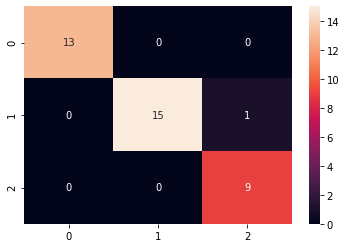

In [13]:
# Visualization of Confusion Matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

Number of Correct Predictions= Sum of diagonal elements= 13+15+9 = 37
<br>Number of Wrong Predictions = sum of rest of the elements = 1
<br>From the confusion matrix the classification report can be verified.

#### K-Means
 - <b>Step 7:</b> Using the Elbow method to find optimum number of clusters

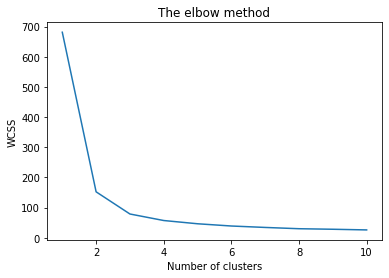

In [14]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # WCSS: Within cluster sum of squares
plt.show()

The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. Clusters that have higher values exhibit greater variability of the observations within the cluster.<br>The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. From this we choose the number of clusters as "3".

 - <b>Step 8:</b> Build the K-Means Clustering model and Predict the clusters

In [15]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Applying kmeans to the dataset
y_kmeans = kmeans.fit_predict(x)

 - <b>Step 9:</b> Visualize the clusters on a graph

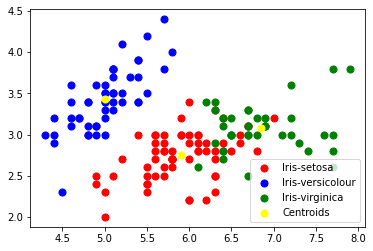

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

# <b>_____________</b>